# NOAA Weather - Results
### <i>Experiment 1.2 - Boosting Algorithms vs Random Forest</i> 
<hr>

In [1]:
###### importing dependencies #############################################
import matplotlib.pyplot as plt
from cryptoaml.utils import read_pickle
from IPython.core.display import display, HTML
from cryptoaml.metrics import (
    results_table, 
    plot_metric_dist,
    plot_feature_imp,
    print_model_params, 
    plot_result_matrices,
    display_metrics_stats,
    elliptic_time_indexed_results
)

###### constants ##########################################################
EXP_RESULT_PATH     = "persistence/experiment_1.2/results"
BENCHMARK_RESULTS   = "{}/{}".format(EXP_RESULT_PATH, "benchmark_model_results.pkl")
# BENCHMARK_TUNED_RESULTS = "{}/{}".format(EXP_RESULT_PATH, "tuned_benchmark_results.pkl")

DEFAULT_RESULTS     = "{}/{}".format(EXP_RESULT_PATH, "defaults_models_results.pkl")
TUNED_RESULTS       = "{}/{}".format(EXP_RESULT_PATH, "tuned_models_results.pkl")

<a id='benchmark'></a>
## Benchmark Models 

<a id='benchmark_rf_default'></a>
### Random Forest - Default Hyperparameters 

In [2]:
benchmark_model = "random_forest"
benchmark_results = read_pickle(BENCHMARK_RESULTS)

<a id='benchmark_rf_default_eval'></a>
####  RF Default Hyperparameters - Evaluation Metrics
- Precision 
- Recall 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- <i>AUC</i>
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [3]:
print("Performance metrics for RF benchmark model with default hyperparameters")
benchmark_metrics_df = results_table(benchmark_results)
display(benchmark_metrics_df)

Performance metrics for RF benchmark model with default hyperparameters


,model,precision,recall,f1_micro,accuracy,auc,f1
0,random_forest_ALL,0.742,0.589,0.78,0.78,0.738,0.657


<a id='benchmark_rf_default_stats'></a>
#### RF Default Hyperparameters - Evaluation Statistics

<i>Note: Since random forest is non-deterministic in nature, we ran the model for 100 iterations and averaged the results. This was done to insure robustness and was also recommended in previous studies.<i/>
    
Below we show statistics for the evaluation metrics.

'random_forest' on 'ALL' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.742318,0.588759,0.780177,0.780177,0.737618,0.656654
std,29.011492,0.005072,0.005696,0.002122,0.002122,0.002490,0.003710
min,0.000000,0.728814,0.574150,0.775694,0.775694,0.732144,0.648618
25%,24.750000,0.739403,0.585350,0.778774,0.778774,0.735690,0.653771
50%,49.500000,0.742419,0.589083,0.780107,0.780107,0.737622,0.656908
75%,74.250000,0.745346,0.592688,0.781577,0.781577,0.739166,0.659039
max,99.000000,0.754564,0.604016,0.785255,0.785255,0.744101,0.666477


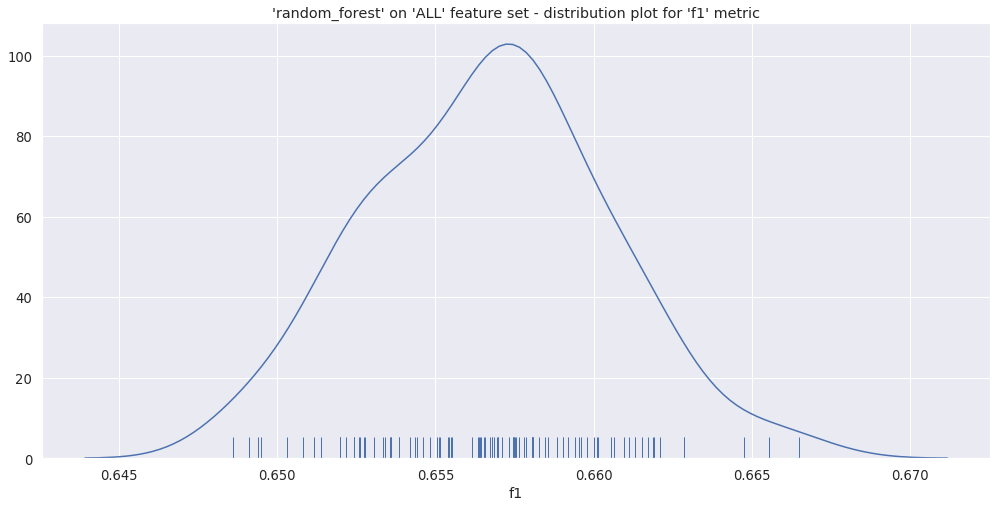

In [4]:
display_metrics_stats(benchmark_results)
plot_metric_dist(benchmark_results, "f1", figsize=(17,8))

<a id='benchmark_rf_default_matrix'></a>
####  RF Default Hyperparameters - Confusion Matrix

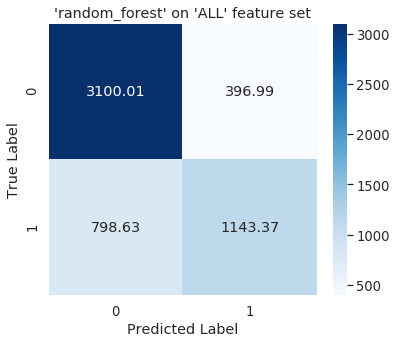

In [5]:
plot_result_matrices(benchmark_results, figsize=(6,5))

## Boosting Algorithms
- [XGBoost: eXtreme Gradient Boosting](https://xgboost.readthedocs.io/en/latest/) 
- [LightGBM: Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/latest/) 
- [CatBoost](https://catboost.ai/)

### Boosting Algorithms - Default Hyperparameters

In [6]:
default_results = read_pickle(DEFAULT_RESULTS)

#### Boosting Default Hyperparameters - Evaluation Metrics
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>`

In [7]:
print("Performance metrics for defaults boosting models")
defaults_metrics_df = results_table(default_results)
display(defaults_metrics_df)

print("Performance metrics for defaults boosting models sorted by f1-score")
display(defaults_metrics_df.sort_values("f1", ascending=False))

Performance metrics for defaults boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.729,0.594,0.776,0.776,0.736,0.655
1,light_boost_ALL,0.735,0.617,0.784,0.784,0.747,0.671
2,cat_boost_ALL,0.748,0.630,0.792,0.792,0.756,0.684


Performance metrics for defaults boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
2,cat_boost_ALL,0.748,0.630,0.792,0.792,0.756,0.684
1,light_boost_ALL,0.735,0.617,0.784,0.784,0.747,0.671
0,xg_boost_ALL,0.729,0.594,0.776,0.776,0.736,0.655


#### Boosting Default Hyperparameters - Confusion Matrices

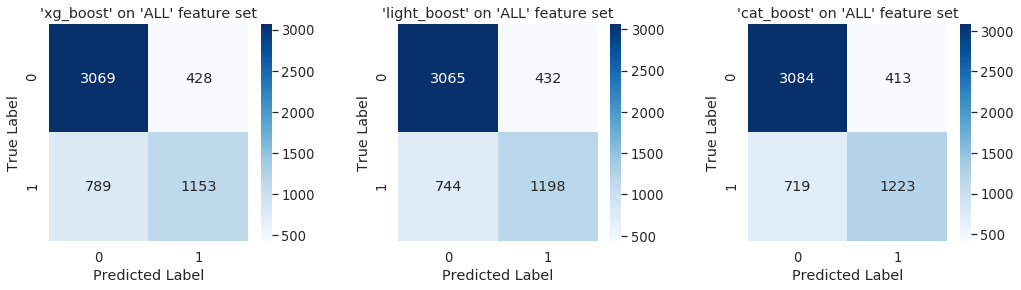

In [8]:
plot_result_matrices(default_results, figsize=(17,4), columns=3)

#### Boosting Default Hyperparameters - F1 Results over Test Span

In [9]:
# in this plot we also display benchmark model
# tmp_results = {**benchmark_results, **default_results}
# elliptic_time_indexed_results(default_results)

### Boosting Algorithms - Tuned Hyperparameters 

In [10]:
tuned_results = read_pickle(TUNED_RESULTS)

#### Boosting Tuned Hyperparameters - Evaluation Metrics
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [11]:
# dataframe with all the perfomance metrics
print("Performance metrics for tuned boosting models")
tuned_metrics_df = results_table(tuned_results)
display(tuned_metrics_df)

# sorted by f1 score/home/delinvas/repos/aml-crypto-graph/src/cryptoaml/datareader/_elliptic_dr.py
print("Performance metrics for tuned boosting models sorted by f1-score")
display(tuned_metrics_df.sort_values("f1", ascending=False))

Performance metrics for tuned boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.748,0.615,0.789,0.789,0.750,0.675
1,light_boost_ALL,0.747,0.643,0.795,0.795,0.761,0.691
2,cat_boost_ALL,0.752,0.623,0.792,0.792,0.754,0.681


Performance metrics for tuned boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
1,light_boost_ALL,0.747,0.643,0.795,0.795,0.761,0.691
2,cat_boost_ALL,0.752,0.623,0.792,0.792,0.754,0.681
0,xg_boost_ALL,0.748,0.615,0.789,0.789,0.750,0.675
